In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc

rc('font', family='AppleGothic')

In [169]:
dong = pd.read_csv("./concat_by_dong.csv")
dong

,county_name,town_name,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
0,종로구,신교동,99144.0,1341,600,741,157,177,19,58,1,0
1,종로구,누상동,261803.6,3177,1429,1748,350,422,22,122,0,0
2,종로구,옥인동,414842.7,1854,842,1012,260,308,40,188,0,1
3,종로구,필운동,86207.7,981,448,533,122,146,11,66,2,0
4,종로구,사직동,284141.8,3166,1393,1773,325,418,24,140,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440,서초구,잠원동,3035875.4,50621,24212,26409,5567,6182,255,590,2,0
441,강남구,삼성동,3193589.8,42657,20583,22074,5531,6182,697,1268,10,2
442,강남구,압구정동,2685131.5,30190,14013,16177,2739,3349,129,44,0,1
443,송파구,신천동,4346310.8,37702,18034,19668,3663,4328,101,102,0,1


In [170]:
danger = dong[(dong["county_name"]=="강남구")]
danger

,county_name,town_name,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num
138,강남구,개포동,5424693.6,80274,38384,41890,9506,10131,719,841,11,1
139,강남구,대치동,3791374.3,80548,40152,40396,8316,8563,819,1190,16,1
140,강남구,세곡동,2419519.9,14344,6774,7570,1680,1809,186,246,0,1
141,강남구,자곡동,2666412.0,27340,12682,14658,3420,4475,137,0,1,0
142,강남구,율현동,1275047.9,3792,1853,1939,506,476,88,3,0,0
143,강남구,일원동,3103355.1,47813,23928,23885,5896,6126,424,290,1,1
144,강남구,수서동,2629173.6,21806,9929,11877,2337,2471,232,83,0,1
145,강남구,도곡동,2038231.2,53059,24817,28242,5301,6426,420,509,4,0
280,강남구,역삼동,3497522.1,70497,33635,36862,11524,13557,959,2202,44,2
281,강남구,청담동,2332909.5,24659,11506,13153,3057,3819,478,963,5,1


In [171]:
danger["cctv_2030w"] = (danger["cctv_num"] / danger["women_2030"]) * 1000

/var/folders/bc/bsqk8v9x20jgf1jsh_fbh7z40000gn/T/ipykernel_6656/2166118275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danger["cctv_2030w"] = (danger["cctv_num"] / danger["women_2030"]) * 1000


In [173]:
danger[["town_name", "cctv_2030w"]].sort_values(by="cctv_2030w", ascending=False)

,town_name,cctv_2030w
282,신사동,303.894679
142,율현동,184.873950
281,청담동,125.163655
441,삼성동,112.746684
283,논현동,111.111111
140,세곡동,102.819237
139,대치동,95.644050
144,수서동,93.889114
138,개포동,70.970289
280,역삼동,70.738364


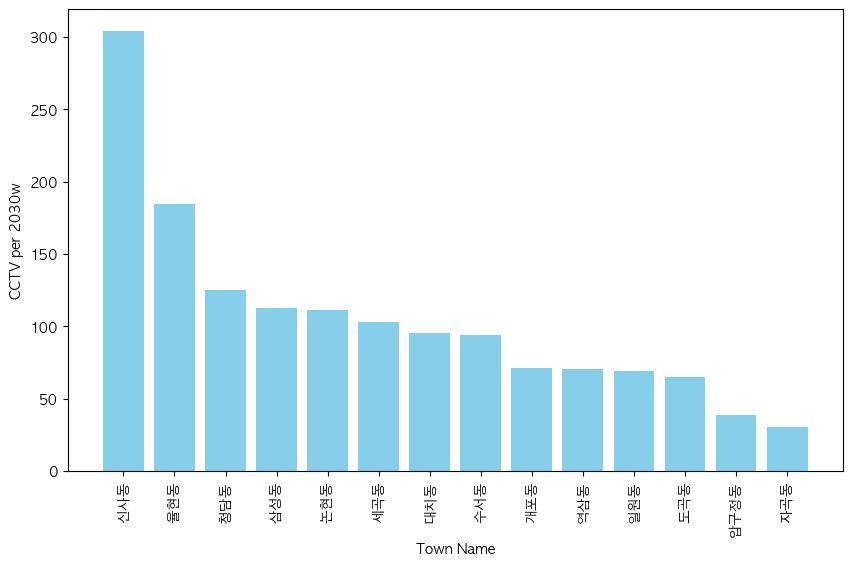

In [174]:
# "town_name"과 "cctv_2030w" 열 선택 및 정렬
danger_sorted = danger[["town_name", "cctv_2030w"]].sort_values(by="cctv_2030w", ascending=False)

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(danger_sorted["town_name"], danger_sorted["cctv_2030w"], color='skyblue')
plt.xlabel("Town Name")
plt.ylabel("CCTV per 2030w")
# plt.title("CCTV per 2030w in Each Town (Descending Order)")
plt.xticks(rotation=90)
plt.show()

In [19]:
safe = dong[(dong["county_name"]=="도봉구") | (dong["county_name"]=="성북구") | (dong["county_name"]=="성동구")]
safe

,county_name,town_name,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num,cctv_per_2030w
27,성동구,하왕십리동,622180.7,30254,14389,15865,4181,4808,75,52,1,0,15.599002
28,성동구,사근동,669510.5,6632,3517,3115,1891,1349,53,0,1,0,39.288362
29,성동구,행당동,1490270.1,41800,19927,21873,6648,6975,143,5,3,2,20.501792
30,성동구,성수동2가,2228462.4,24586,12551,12035,3896,3818,176,23,3,2,46.097433
31,성동구,송정동,1443952.4,9825,5207,4618,1589,1417,98,0,0,0,69.160198
32,성동구,용답동,1590852.2,11953,6106,5847,2265,2489,89,48,0,1,35.757332
52,성북구,돈암동,1131555.3,38204,17989,20215,4470,4828,131,329,0,1,27.133389
53,성북구,안암동3가,108418.8,3647,1866,1781,762,560,25,114,0,0,44.642857
54,성북구,정릉동,8393990.8,77874,37537,40337,10881,10429,708,669,5,2,67.887621
55,성북구,종암동,1458281.9,37609,18578,19031,5216,4731,258,820,3,1,54.533925


In [7]:
safe[safe["county_name"]=="도봉구"].groupby("town_name")["cctv_num"].sum().sort_values(ascending=False)

town_name
창동     488
쌍문동    351
도봉동    278
방학동    278
Name: cctv_num, dtype: int64

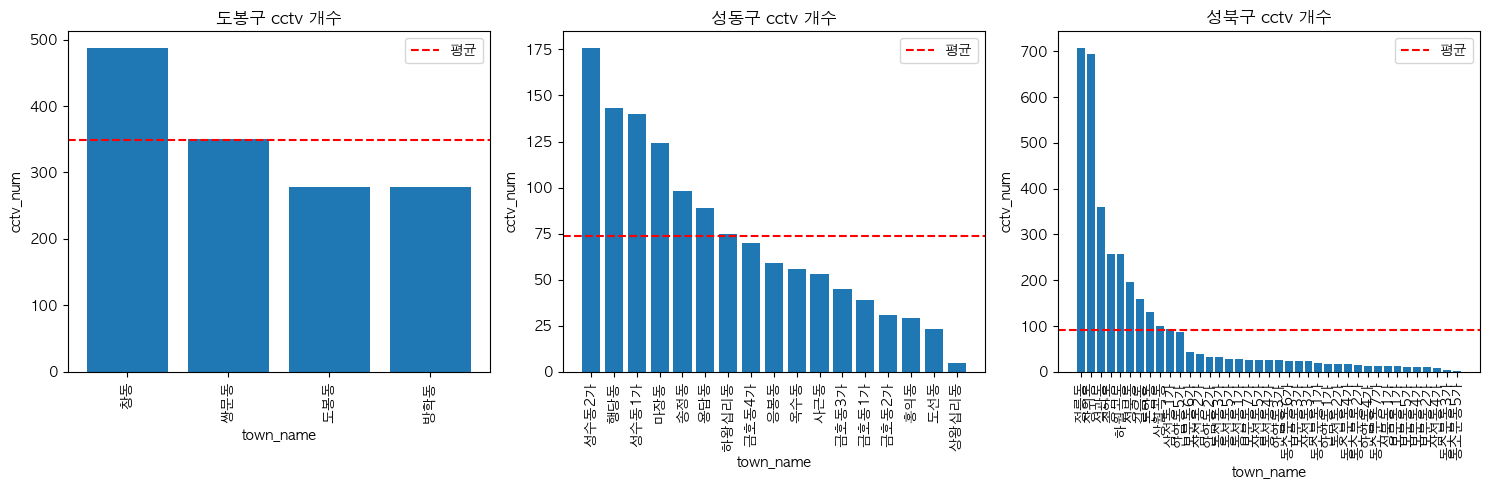

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# "도봉구", "성동구", "성북구"에 해당하는 데이터 추출
county_names = ["도봉구", "성동구", "성북구"]
filtered_data = safe[safe["county_name"].isin(county_names)]

# county_name을 기준으로 그룹화하여 cctv_num의 합계 계산 후 내림차순 정렬
grouped_data = filtered_data.groupby(["county_name", "town_name"])["cctv_num"].sum().reset_index()
grouped_data = grouped_data.sort_values(by="cctv_num", ascending=False)


# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, county_name in enumerate(county_names):
    ax = axes[idx]
    data = grouped_data[grouped_data["county_name"] == county_name]
    # 평균 선 추가
    average = data["cctv_num"].mean()
    
    ax.bar(data["town_name"], data["cctv_num"])
    ax.axhline(y=average, color='r', linestyle='--', label='평균')  # 평균 직선 추가
    ax.set_title(f"{county_name} cctv 개수")
    ax.set_xlabel("town_name")
    ax.set_ylabel("cctv_num")
    ax.legend()
    ax.tick_params(axis='x', rotation=90)  # x 축 레이블 회전

plt.tight_layout()
plt.show()


In [14]:
dong["cctv_per_2030w"] = (dong["cctv_num"] / dong["women_2030"]) * 1000

In [16]:
dong

,county_name,town_name,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num,cctv_per_2030w
0,종로구,신교동,99144.0,1341,600,741,157,177,19,58,1,0,107.344633
1,종로구,누상동,261803.6,3177,1429,1748,350,422,22,122,0,0,52.132701
2,종로구,옥인동,414842.7,1854,842,1012,260,308,40,188,0,1,129.870130
3,종로구,필운동,86207.7,981,448,533,122,146,11,66,2,0,75.342466
4,종로구,사직동,284141.8,3166,1393,1773,325,418,24,140,0,1,57.416268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,서초구,잠원동,3035875.4,50621,24212,26409,5567,6182,255,590,2,0,41.248787
441,강남구,삼성동,3193589.8,42657,20583,22074,5531,6182,697,1268,10,2,112.746684
442,강남구,압구정동,2685131.5,30190,14013,16177,2739,3349,129,44,0,1,38.518961
443,송파구,신천동,4346310.8,37702,18034,19668,3663,4328,101,102,0,1,23.336414


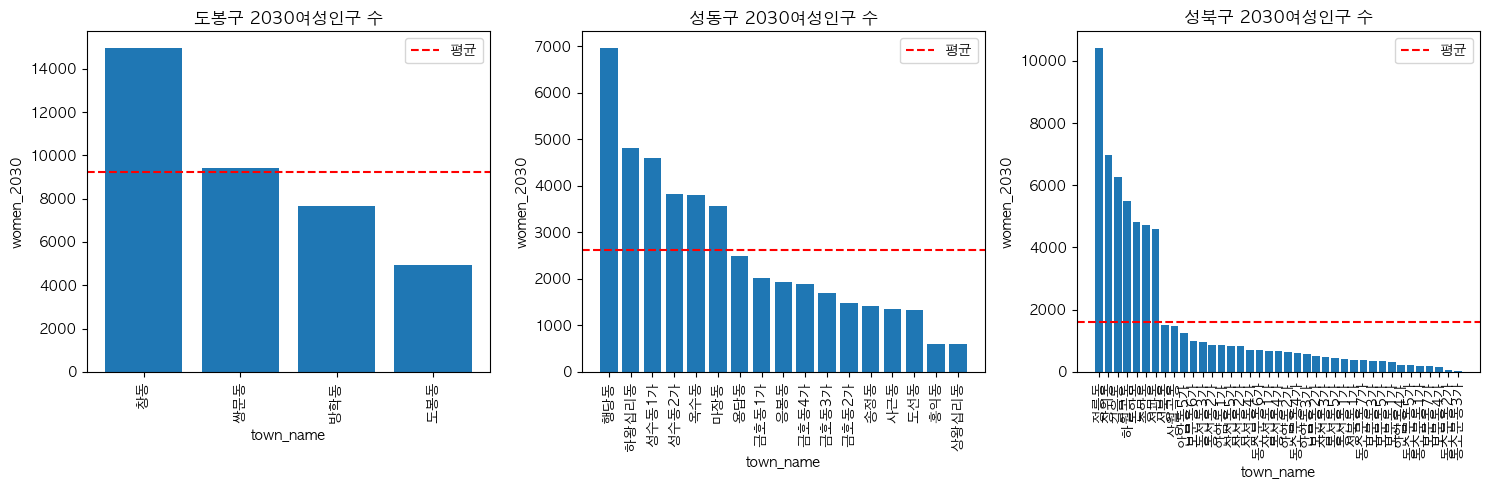

In [46]:
# "도봉구", "성동구", "성북구"에 해당하는 데이터 추출
county_names = ["도봉구", "성동구", "성북구"]
filtered_data = safe[safe["county_name"].isin(county_names)]

# county_name을 기준으로 그룹화하여 cctv_num의 합계 계산 후 내림차순 정렬
grouped_data = filtered_data.groupby(["county_name", "town_name"])["women_2030"].sum().reset_index()
grouped_data = grouped_data.sort_values(by="women_2030", ascending=False)

# 평균 계산
# average = grouped_data["women_2030"].mean()

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, county_name in enumerate(county_names):
    ax = axes[idx]
    data = grouped_data[grouped_data["county_name"] == county_name]
    # 평균 선 추가
    average = data["women_2030"].mean()
    
    ax.bar(data["town_name"], data["women_2030"])
    ax.axhline(y=average, color='r', linestyle='--', label='평균')  # 평균 직선 추가
    ax.set_title(f"{county_name} 2030여성인구 수")
    ax.set_xlabel("town_name")
    ax.set_ylabel("women_2030")
    ax.legend()
    ax.tick_params(axis='x', rotation=90)  # x 축 레이블 회전

plt.tight_layout()
plt.show()

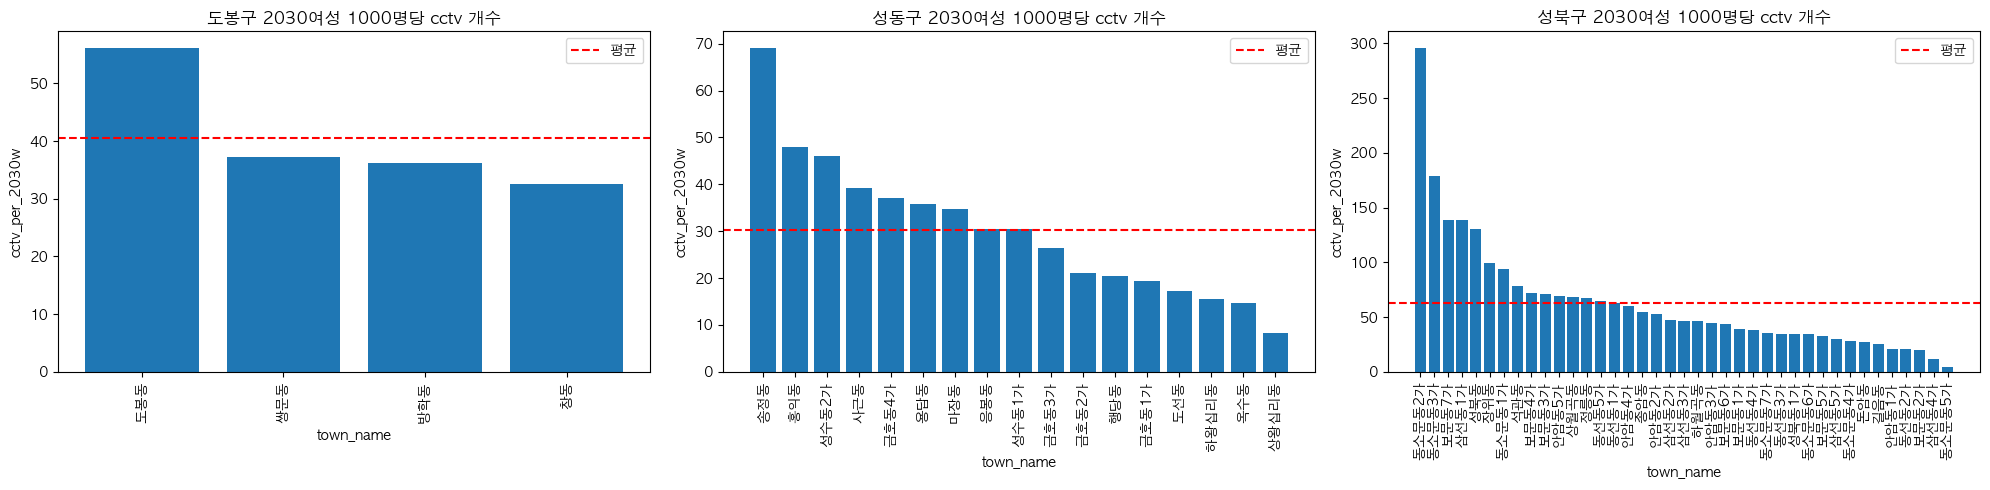

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# "도봉구", "성동구", "성북구"에 해당하는 데이터 추출
county_names = ["도봉구", "성동구", "성북구"]
filtered_data = safe[safe["county_name"].isin(county_names)]

# county_name을 기준으로 그룹화하여 cctv_num의 합계 계산 후 내림차순 정렬
grouped_data = filtered_data.groupby(["county_name", "town_name"])["cctv_per_2030w"].sum().reset_index()
grouped_data = grouped_data.sort_values(by="cctv_per_2030w", ascending=False)

# 평균 계산
average = grouped_data["cctv_per_2030w"].mean()

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for idx, county_name in enumerate(county_names):
    ax = axes[idx]
    data = grouped_data[grouped_data["county_name"] == county_name]
    # 평균 선 추가
    average = data["cctv_per_2030w"].mean()
    
    ax.bar(data["town_name"], data["cctv_per_2030w"])
    ax.axhline(y=average, color='r', linestyle='--', label='평균')  # 평균 직선 추가
    ax.set_title(f"{county_name} 2030여성 1000명당 cctv 개수")
    ax.set_xlabel("town_name")
    ax.set_ylabel("cctv_per_2030w")
    ax.legend()
    ax.tick_params(axis='x', rotation=90)  # x 축 레이블 회전

plt.tight_layout()
plt.show()

In [37]:
pop_dong = dong[["county_name", "town_name", "pop_total", "pop_men", "pop_women", "men_2030", "women_2030"]]

In [38]:
pop_dong.to_csv("./pop_by_dong.csv", index=False)

In [39]:
rank = dong[(dong["county_name"]=="성동구") | (dong["county_name"]=="성북구") | (dong["county_name"]=="도봉구")]

In [44]:
# cctv_per_2030w 열을 기준으로 내림차순 정렬하여 순위를 부여하고 rank 열에 할당
rank['rank'] = rank['cctv_per_2030w'].rank(method='min', ascending=True).astype(int)

/var/folders/bc/bsqk8v9x20jgf1jsh_fbh7z40000gn/T/ipykernel_6656/845360672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['rank'] = rank['cctv_per_2030w'].rank(method='min', ascending=True).astype(int)


In [45]:
rank

,county_name,town_name,area,pop_total,pop_men,pop_women,men_2030,women_2030,cctv_num,light_num,house_num,police_num,cctv_per_2030w,rank
27,성동구,하왕십리동,622180.7,30254,14389,15865,4181,4808,75,52,1,0,15.599002,5
28,성동구,사근동,669510.5,6632,3517,3115,1891,1349,53,0,1,0,39.288362,33
29,성동구,행당동,1490270.1,41800,19927,21873,6648,6975,143,5,3,2,20.501792,9
30,성동구,성수동2가,2228462.4,24586,12551,12035,3896,3818,176,23,3,2,46.097433,36
31,성동구,송정동,1443952.4,9825,5207,4618,1589,1417,98,0,0,0,69.160198,49
32,성동구,용답동,1590852.2,11953,6106,5847,2265,2489,89,48,0,1,35.757332,27
52,성북구,돈암동,1131555.3,38204,17989,20215,4470,4828,131,329,0,1,27.133389,15
53,성북구,안암동3가,108418.8,3647,1866,1781,762,560,25,114,0,0,44.642857,35
54,성북구,정릉동,8393990.8,77874,37537,40337,10881,10429,708,669,5,2,67.887621,47
55,성북구,종암동,1458281.9,37609,18578,19031,5216,4731,258,820,3,1,54.533925,42


In [137]:
cctv = pd.read_csv("./서울시 자치구 CCTV 설치현황_누적.csv")
cctv = cctv.drop(["순번", "총 계", "2015년 이전\n설치된 CCTV", "2015년", "2016년", "2017년", "2018년", "2019년", "2020년", "2021년", "2022년", "2023년"], axis=1)
# cctv

In [138]:
cctv = cctv.iloc[1:26, :]
# cctv

In [141]:
cctv = cctv.rename(mapper={
    "구분": "county_name", 
    "2015년_누적": 2015,
    "2016년_누적": 2016,
    "2017년_누적": 2017,
    "2018년_누적": 2018,
    "2019년_누적": 2019,
    "2020년_누적": 2020,
    "2021년_누적": 2021,
    "2022년_누적": 2022,
}, axis=1)
cctv

,county_name,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,707,835,978,"1,120","1,187","1,424","1,506","1,731"
2,중 구,511,750,"1,122","1,508","1,663","2,027","2,446","2,583"
3,용산구,126,421,912,"1,059","1,394","1,867","2,353","2,853"
4,성동구,542,820,"1,759","2,216","2,856","3,339","3,705","3,938"
5,광진구,404,446,"1,112","1,572","2,284","2,475","3,215","3,488"
6,동대문구,78,827,"1,497","1,696","1,911","2,140","2,366","2,683"
7,중랑구,479,632,802,"1,017","2,091","3,067","3,574","3,868"
8,성북구,575,"1,147","1,595","2,445","3,158","3,384","3,802","4,157"
9,강북구,105,315,319,694,"1,657","2,226","2,524","3,321"
10,도봉구,3,71,151,303,452,608,"1,160","1,717"


In [155]:
# 모든 열에 대해 정규표현식을 적용하여 `,`를 제거하고 int형으로 변환
for column in cctv.columns:
    if column == "county_name":
        continue
    cctv[column] = cctv[column].str.replace(',', '').astype(int)

In [156]:
cctv

,county_name,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,707,835,978,1120,1187,1424,1506,1731
2,중 구,511,750,1122,1508,1663,2027,2446,2583
3,용산구,126,421,912,1059,1394,1867,2353,2853
4,성동구,542,820,1759,2216,2856,3339,3705,3938
5,광진구,404,446,1112,1572,2284,2475,3215,3488
6,동대문구,78,827,1497,1696,1911,2140,2366,2683
7,중랑구,479,632,802,1017,2091,3067,3574,3868
8,성북구,575,1147,1595,2445,3158,3384,3802,4157
9,강북구,105,315,319,694,1657,2226,2524,3321
10,도봉구,3,71,151,303,452,608,1160,1717


In [157]:
cctv[cctv["county_name"]=="도봉구"].transpose().iloc[1:, :]

,10
2015,3
2016,71
2017,151
2018,303
2019,452
2020,608
2021,1160
2022,1717


In [158]:
crime[crime["county_name"]=="도봉구"].transpose().iloc[1:, :]

,10
2015,2562
2016,2315
2017,1895
2018,2136
2019,2020
2020,2097
2021,1788
2022,2071


In [159]:
sex_crime[sex_crime["county_name"]=="도봉구"].transpose().iloc[1:, :]

,10
2015,102
2016,123
2017,104
2018,113
2019,90
2020,82
2021,72
2022,70


In [410]:
import pandas as pd

county = "마포구"

# 각 데이터프레임 생성
cctv_dobong = cctv[cctv["county_name"] == county].transpose().iloc[1:, :]
crime_dobong = crime[crime["county_name"] == county].transpose().iloc[1:, :]
sex_crime_dobong = sex_crime[sex_crime["county_name"] == county].transpose().iloc[1:, :]

# 열 이름 설정 후 concat을 통해 데이터프레임 합치기
cctv_dobong.columns = ["cctv"]
crime_dobong.columns = ["crime"]
sex_crime_dobong.columns = ["sex_crime"]
mapo = pd.concat([cctv_dobong, crime_dobong, sex_crime_dobong], axis=1)

mapo

,cctv,crime,sex_crime
2015,257,5560,294
2016,703,5474,399
2017,1071,4778,500
2018,1439,4699,473
2019,1933,4347,495
2020,2231,3340,348
2021,2408,3219,321
2022,2532,3660,436


In [208]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss


def plot_multiple_timeseries(df, target_columns):
    fig = plt.figure(figsize=(10, len(target_columns) * 1.5))
    plt.subplots_adjust(hspace=1)
    for i, target_column in enumerate(target_columns):
        ax = fig.add_subplot(len(target_columns), 1, (i+1))
        df[target_column].plot(ax=ax, title=target_column)
        ax.set_xlabel('')
    

def plot_acf_pacf(df, target_column, lags=30):
    target_series = df[target_column].dropna()
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    plot_acf(df[target_column].dropna(), ax=ax1, lags=lags);
    plot_pacf(df[target_column].dropna(), ax=ax2, lags=lags);
    
    
def stationary_test(df, target_column):
    target_series = df[target_column].dropna()
    adf_result = adfuller(target_series)
    adf_p_value = adf_result[1]
    kpss_result = kpss(target_series)
    kpss_p_value = kpss_result[1]
    print(f"{target_column} ADF p-value: {round(adf_p_value, 4)} stationary: {adf_p_value < 0.05}")
    print(f"{target_column} KPSS p-value: {round(kpss_p_value, 4)} stationary: {kpss_p_value > 0.05}")


def calculate_rmse(df, label_column, target_column):
    target_df = df[[label_column, target_column]].dropna()
    rmse = mean_squared_error(target_df[label_column], target_df[target_column], squared=False)
    print(f"{target_column} RMSE: {rmse}")

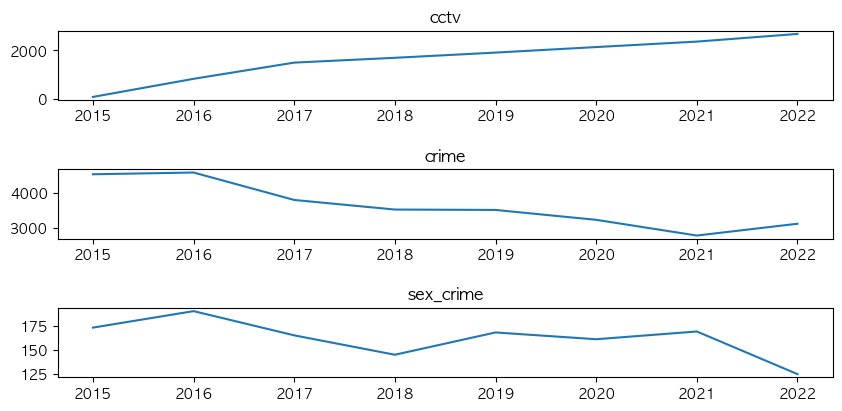

In [285]:
# from utils import plot_multiple_timeseries

plot_multiple_timeseries(dobong, ["cctv", "crime", "sex_crime"])

In [415]:
gangnam["pop"] = [576495, 567115, 556164, 542364, 545169, 539231, 533042, 529102]
gangnam["crime_per_pop"] = (gangnam["crime"] / gangnam["pop"]) * 1000
gangnam["cctv_per_pop"] = (gangnam["cctv"] / gangnam["pop"]) * 1000
gangnam

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,sex_per_pop,cctv_per_pop
2015,1486,8168,449,576495,14.16838,0.48,187083,89799.84,5.000009,0.778845,2.577646
2016,2766,7633,516,567115,13.459351,0.48,180785,86776.80,5.94629,0.909868,4.877318
2017,3747,7113,607,556164,12.789393,0.48,173911,83477.28,7.27144,1.091405,6.737221
2018,4482,6913,600,542364,12.746052,0.48,167168,80240.64,7.477508,1.106268,8.263823
2019,5269,6638,666,545169,12.176041,0.48,164614,79014.72,8.428809,1.22164,9.664893
2020,6182,6648,708,539231,12.328668,0.48,158744,76197.12,9.29169,1.312981,11.464474
2021,6687,5568,578,533042,10.445706,0.48,151341,72643.68,7.956645,1.084342,12.544978
2022,7275,6280,667,529102,11.869167,0.48,146744,70437.12,9.469439,1.260626,13.749712


In [417]:
yongsan["pop"] = [233342, 230241, 229161, 228999, 228670, 230040, 222953, 218650]
yongsan["crime_per_pop"] = (yongsan["crime"] / yongsan["pop"]) * 1000
yongsan["cctv_per_pop"] = (yongsan["cctv"] / yongsan["pop"]) * 1000
yongsan

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,sex_per_pop,cctv_per_pop
2015,126,3626,194,233342,15.539423,0.49,76939,37700.11,5.145874,0.831398,0.53998
2016,421,3886,251,230241,16.877967,0.48,75897,36430.56,6.88982,1.090162,1.828519
2017,912,3733,327,229161,16.289857,0.48,76835,36880.80,8.866402,1.426944,3.979735
2018,1059,3080,331,228999,13.44984,0.48,78294,37581.12,8.807614,1.445421,4.624474
2019,1394,3041,272,228670,13.29864,0.48,78545,37701.60,7.214548,1.189487,6.096121
2020,1867,2739,230,230040,11.906625,0.48,77841,37363.68,6.155711,0.999826,8.11598
2021,2353,2240,141,222953,10.046961,0.48,76406,36674.88,3.844593,0.63242,10.553794
2022,2853,2687,280,218650,12.289046,0.48,75837,36401.76,7.691936,1.280585,13.048251


In [418]:
# 영등포
yeondeung["pop"] = [378504, 370613, 368550, 367778, 367678, 379480, 376837, 375675]
yeondeung["crime_per_pop"] = (yeondeung["crime"] / yeondeung["pop"]) * 1000
yeondeung["cctv_per_pop"] = (yeondeung["cctv"] / yeondeung["pop"]) * 1000
yeondeung

,cctv,crime,sex_crime,pop,crime_per_pop,cctv_per_pop
2015,1263,6572,295,378504,17.363093,3.336821
2016,1511,5966,356,370613,16.097654,4.077029
2017,1822,5514,455,368550,14.961335,4.943698
2018,2479,5449,391,367778,14.816003,6.740479
2019,2544,5464,356,367678,14.860829,6.919098
2020,3758,4902,315,379480,12.917677,9.903025
2021,4041,3900,279,376837,10.349302,10.723469
2022,4382,4492,327,375675,11.957144,11.664338


In [345]:
dobong['pop'] = [351242, 348220, 344166, 339413, 333362, 325257, 317366, 311694]
dobong["crime_per_pop"] = (dobong["crime"] / dobong["pop"]) * 1000
dobong

,cctv,crime,sex_crime,pop,crime_per_pop
2015,3,2562,102,351242,7.294116
2016,71,2315,123,348220,6.648096
2017,151,1895,104,344166,5.506064
2018,303,2136,113,339413,6.293218
2019,452,2020,90,333362,6.059479
2020,608,2097,82,325257,6.447209
2021,1160,1788,72,317366,5.633874
2022,1717,2071,70,311694,6.644337


In [421]:
# 성북구
seongbook["pop"] = [459275, 450355, 444055, 435868, 442650, 437153, 430528, 430397]
seongbook["crime_per_pop"] = (seongbook["crime"] / seongbook["pop"]) * 1000
seongbook["cctv_per_pop"] = (seongbook["cctv"] / seongbook["pop"]) * 1000
seongbook

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,cctv_per_pop
2015,575,4004,150,459275,8.718088,0.49,143217,70176.33,2.137473,1.251973
2016,1147,3590,154,450355,7.971489,0.49,138988,68104.12,2.261244,2.54688
2017,1595,3261,173,444055,7.343685,0.49,136098,66688.02,2.594169,3.591897
2018,2445,2859,183,435868,6.559325,0.49,133908,65614.92,2.789,5.609496
2019,3158,2701,176,442650,6.101886,0.48,136901,65712.48,2.678334,7.134305
2020,3384,2425,142,437153,5.547257,0.48,133917,64280.16,2.20908,7.740997
2021,3802,2293,118,430528,5.326018,0.48,130835,62800.80,1.878957,8.831017
2022,4157,2591,158,430397,6.020023,0.48,131441,63091.68,2.504292,9.658525


In [423]:
# 동작구
dongjak["pop"] = [400641, 400997, 396217, 396203, 395963, 391220, 385483, 380596]
dongjak["crime_per_pop"] = (dongjak["crime"] / dongjak["pop"]) * 1000
dongjak["cctv_per_pop"] = (dongjak["cctv"] / dongjak["pop"]) * 1000
dongjak

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,cctv_per_pop
2015,658,3789,285,400641,9.457345,0.49,139645,68426.05,4.16508,1.642368
2016,903,2902,325,400997,7.236962,0.49,139271,68242.79,4.762408,2.251887
2017,1173,2934,396,396217,7.405033,0.49,137006,67132.94,5.898744,2.960499
2018,1472,2812,288,396203,7.097372,0.49,137860,67551.40,4.26342,3.715267
2019,1784,3149,251,395963,7.952763,0.48,137339,65922.72,3.807489,4.505471
2020,2217,2974,226,391220,7.601861,0.48,134146,64390.08,3.509857,5.666888
2021,2245,2451,180,385483,6.358257,0.48,130403,62593.44,2.875701,5.823863
2022,2617,2523,212,380596,6.629077,0.48,129882,62343.36,3.400523,6.876058


In [343]:
songpa["pop"] = [660302, 657831, 664496, 666635, 675961, 667960, 658338, 658801]
songpa["crime_per_pop"] = (songpa["crime"] / songpa["pop"]) * 1000
songpa

,cctv,crime,sex_crime,pop,crime_per_pop
2015,406,6558,220,660302,9.931819
2016,532,5856,234,657831,8.901982
2017,759,5288,288,664496,7.957911
2018,1285,5498,309,666635,8.247392
2019,2335,5425,273,675961,8.025611
2020,2572,5123,287,667960,7.669621
2021,2723,4467,247,658338,6.785268
2022,3154,4877,290,658801,7.402842


In [344]:
gwanak['pop'] = [509663, 506851, 503297, 501957, 500094, 495060, 485699, 486752]
gwanak["crime_per_pop"] = (gwanak["crime"] / gwanak["pop"]) * 1000
gwanak

,cctv,crime,sex_crime,pop,crime_per_pop
2015,1221,6025,320,509663,11.821537
2016,1828,5356,322,506851,10.567208
2017,2503,5146,379,503297,10.224579
2018,3166,4674,352,501957,9.311555
2019,4055,4920,408,500094,9.83815
2020,4459,4858,403,495060,9.812952
2021,5008,4123,321,485699,8.488797
2022,5143,4552,327,486752,9.351785


In [346]:
seongdong['pop'] = [297003, 299259, 304808, 308221, 300889, 293556, 285990, 281000]
seongdong["crime_per_pop"] = (seongdong["crime"] / seongdong["pop"]) * 1000
seongdong

,cctv,crime,sex_crime,pop,crime_per_pop
2015,542,3232,126,297003,10.882045
2016,820,2922,104,299259,9.764117
2017,1759,2635,132,304808,8.644786
2018,2216,2331,126,308221,7.562755
2019,2856,2379,133,300889,7.90657
2020,3339,2247,115,293556,7.654417
2021,3705,2002,110,285990,7.000245
2022,3938,2069,125,281000,7.362989


In [347]:
seodaemoon["pop"] = [312141, 314194, 312800, 310313, 309397, 312173, 304819, 306337]
seodaemoon["crime_per_pop"] = (seodaemoon["crime"] / seodaemoon["pop"]) * 1000
seodaemoon

,cctv,crime,sex_crime,pop,crime_per_pop
2015,1235,3875,154,312141,12.414262
2016,1512,3490,175,314194,11.107787
2017,1928,2911,202,312800,9.306266
2018,2174,2596,206,310313,8.365747
2019,2499,2768,175,309397,8.946435
2020,2940,2374,159,312173,7.604758
2021,3271,2141,137,304819,7.02384
2022,3445,2217,157,306337,7.237128


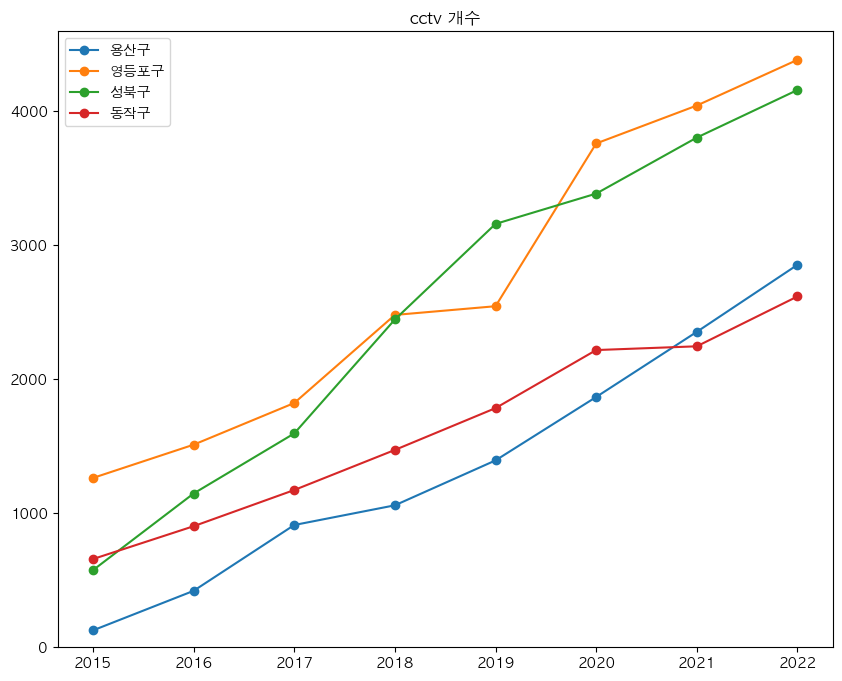

In [432]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot()
# 범죄 상위 3개 구
# 강남구
# ax.plot(gangnam.index, gangnam["cctv"], marker='o', label="강남cctv")
# ax.plot(gangnam.index, gangnam["crime"], marker='o', label="강남crime")
# ax.plot(gangnam.index, gangnam["sex_crime"], marker='o', label="강남sex_crime")
# ax.plot(gangnam.index, gangnam["crime_per_pop"], marker='o', label="강남구")
# ax.plot(gangnam.index, gangnam["cctv_per_pop"], marker='o', label="강남구")

# 용산
# ax.plot(yongsan.index, yongsan["crime_per_pop"], marker='o', label="용산구")
ax.plot(yongsan.index, yongsan["cctv"], marker='o', label="용산구")
# ax.plot(yongsan.index, yongsan["cctv_per_pop"], marker='o', label="용산구")

# 영등포
# ax.plot(yeondeung.index, yeondeung["crime_per_pop"], marker='o', label="영등포구")
# ax.plot(yeondeung.index, yeondeung["cctv_per_pop"], marker='o', label="영등포구")
ax.plot(yeondeung.index, yeondeung["cctv"], marker='o', label="영등포구")

# 범죄 하위 3개 구
# 도봉구
# ax.plot(dobong.index, dobong["cctv"], marker='o', label="도봉cctv")
# ax.plot(dobong.index, dobong["crime"], marker='o', label="도봉crime")
# ax.plot(dobong.index, dobong["sex_crime"], marker='o', label="도봉sex_crime")
# ax.plot(dobong.index, dobong["crime_per_pop"], marker='o', label="도봉구")

# 성북구
# ax.plot(seongbook.index, seongbook["crime_per_pop"], marker='o', label="성북구")
# ax.plot(seongbook.index, seongbook["cctv_per_pop"], marker='o', label="성북구")
ax.plot(seongbook.index, seongbook["cctv"], marker='o', label="성북구")

# 동작구
# ax.plot(dongjak.index, dongjak["crime_per_pop"], marker='o', label="동작구")
# ax.plot(dongjak.index, dongjak["cctv_per_pop"], marker='o', label="동작구")
ax.plot(dongjak.index, dongjak["cctv"], marker='o', label="동작구")


ax.legend() ## 범례
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, ) # crime
# plt.ylim(0, 750) # sex_crime

# plt.title("상/하위 3개 구 cctv ~ 범죄")
# plt.title("상/하위 3개 구 cctv ~ 성 범죄")
# plt.title("인구 1000명당 범죄 발생")
# plt.title("인구 1000명당 cctv 수")

plt.title("cctv 개수") # cctv
# plt.title('(성 범죄 제외)범죄 건수')    # crime
# plt.title('성 범죄 건수')    # sex_crime
plt.show()


In [391]:
yeondeung

,cctv,crime,sex_crime,pop,crime_per_pop
2015,1263,6572,295,378504,17.363093
2016,1511,5966,356,370613,16.097654
2017,1822,5514,455,368550,14.961335
2018,2479,5449,391,367778,14.816003
2019,2544,5464,356,367678,14.860829
2020,3758,4902,315,379480,12.917677
2021,4041,3900,279,376837,10.349302
2022,4382,4492,327,375675,11.957144


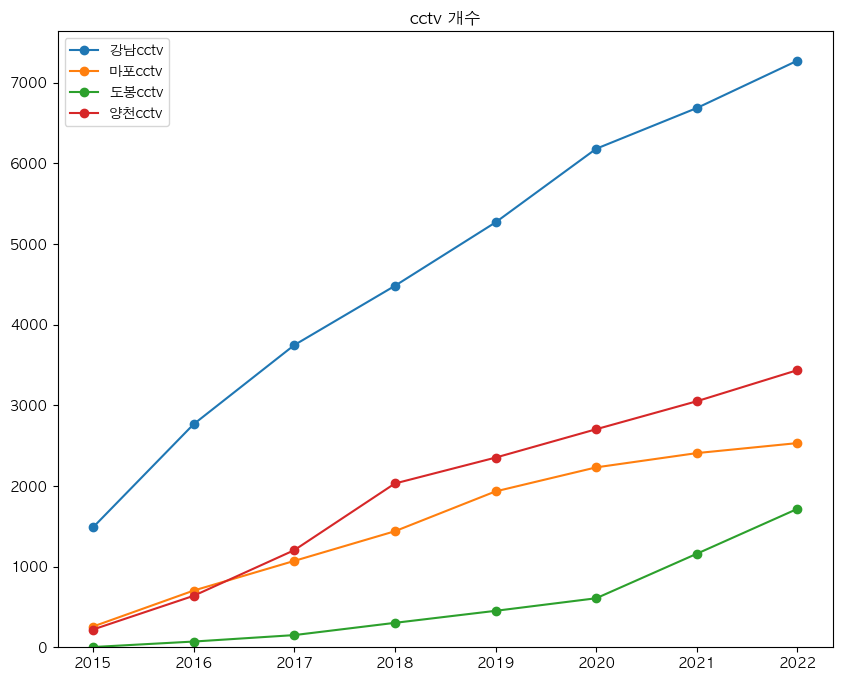

In [412]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot()
# 범죄 상위 3개 구
# 강남구
ax.plot(gangnam.index, gangnam["cctv"], marker='o', label="강남cctv")
# ax.plot(gangnam.index, gangnam["crime"], marker='o', label="강남crime")
# ax.plot(gangnam.index, gangnam["sex_crime"], marker='o', label="강남sex_crime")
# ax.plot(gangnam.index, gangnam["crime_per_pop"], marker='o', label="강남")

# 마포(성범죄)
ax.plot(mapo.index, mapo["cctv"], marker='o', label="마포cctv")
# ax.plot(mapo.index, mapo["sex_crime"], marker='o', label="마포sex_crime")

# 영등포
# ax.plot(yeondeung.index, yeondeung["cctv"], marker='o', label="영등포cctv")


# 관악구
# ax.plot(gwanak.index, gwanak["cctv"], marker='o', label="관악cctv")
# ax.plot(gwanak.index, gwanak["crime"], marker='o', label="관악crime")
# ax.plot(gwanak.index, gwanak["sex_crime"], marker='o', label="관악sex_crime")
# ax.plot(gwanak.index, gwanak["crime_per_pop"], marker='o', label="관악")

# 범죄 하위 3개 구
# 도봉구
ax.plot(dobong.index, dobong["cctv"], marker='o', label="도봉cctv")
# ax.plot(dobong.index, dobong["crime"], marker='o', label="도봉crime")
# ax.plot(dobong.index, dobong["sex_crime"], marker='o', label="도봉sex_crime")
# ax.plot(dobong.index, dobong["crime_per_pop"], marker='o', label="도봉")

# 양천(성범죄)
ax.plot(yangcheon.index, yangcheon["cctv"], marker='o', label="양천cctv")
# ax.plot(yangcheon.index, yangcheon["sex_crime"], marker='o', label="양천sex_crime")

# 성동구
# ax.plot(seongdong.index, seongdong["cctv"], marker='o', label="성동cctv")
# ax.plot(seongdong.index, seongdong["crime"], marker='o', label="성동crime")
# ax.plot(seongdong.index, seongdong["sex_crime"], marker='o', label="성동sex_crime")
# ax.plot(seongdong.index, seongdong["crime_per_pop"], marker='o', label="성동")


ax.legend() ## 범례
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, ) # crime
# plt.ylim(0, 750) # sex_crime

# plt.title("상/하위 3개 구 cctv ~ 범죄")
# plt.title("상/하위 3개 구 cctv ~ 성 범죄")
# plt.title("인구 1000명당 범죄 발생")

plt.title("cctv 개수") # cctv
# plt.title('(성 범죄 제외)범죄 건수')    # crime
# plt.title('성 범죄 건수')    # sex_crime
plt.show()


In [402]:
# 강남
# 여성 성비
gangnam["w_ratio"] = 0.48
gangnam["pop_2030"] = [187083, 180785, 173911, 167168, 164614, 158744, 151341, 146744]
gangnam["w_2030"] = gangnam["pop_2030"] * gangnam["w_ratio"]
gangnam["sex_per_w2030"] = (gangnam["sex_crime"] / gangnam["w_2030"]) * 1000
gangnam["sex_per_pop"] = (gangnam["sex_crime"] / gangnam["pop"]) * 1000
gangnam

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,sex_per_pop
2015,1486,8168,449,576495,14.16838,0.48,187083,89799.84,5.000009,0.778845
2016,2766,7633,516,567115,13.459351,0.48,180785,86776.80,5.94629,0.909868
2017,3747,7113,607,556164,12.789393,0.48,173911,83477.28,7.27144,1.091405
2018,4482,6913,600,542364,12.746052,0.48,167168,80240.64,7.477508,1.106268
2019,5269,6638,666,545169,12.176041,0.48,164614,79014.72,8.428809,1.22164
2020,6182,6648,708,539231,12.328668,0.48,158744,76197.12,9.29169,1.312981
2021,6687,5568,578,533042,10.445706,0.48,151341,72643.68,7.956645,1.084342
2022,7275,6280,667,529102,11.869167,0.48,146744,70437.12,9.469439,1.260626


In [400]:
# 용산
# 여성 성비
yongsan["w_ratio"] = [0.49, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48]
yongsan["pop_2030"] = [76939, 75897, 76835, 78294, 78545, 77841, 76406, 75837]
yongsan["w_2030"] = yongsan["pop_2030"] * yongsan["w_ratio"]
yongsan["sex_per_w2030"] = (yongsan["sex_crime"] / yongsan["w_2030"]) * 1000
yongsan["sex_per_pop"] = (yongsan["sex_crime"] / yongsan["pop"]) * 1000
yongsan

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,sex_per_pop
2015,126,3626,194,233342,15.539423,0.49,76939,37700.11,5.145874,0.831398
2016,421,3886,251,230241,16.877967,0.48,75897,36430.56,6.88982,1.090162
2017,912,3733,327,229161,16.289857,0.48,76835,36880.80,8.866402,1.426944
2018,1059,3080,331,228999,13.44984,0.48,78294,37581.12,8.807614,1.445421
2019,1394,3041,272,228670,13.29864,0.48,78545,37701.60,7.214548,1.189487
2020,1867,2739,230,230040,11.906625,0.48,77841,37363.68,6.155711,0.999826
2021,2353,2240,141,222953,10.046961,0.48,76406,36674.88,3.844593,0.63242
2022,2853,2687,280,218650,12.289046,0.48,75837,36401.76,7.691936,1.280585


In [385]:
# 강북
gangbook["w_ratio"] = 0.49
gangbook["pop_2030"] = [94687, 92503, 91174, 89221, 86345, 83593, 79970, 78131]
gangbook["w_2030"] = gangbook["pop_2030"] * gangbook["w_ratio"]
gangbook["sex_per_w2030"] = (gangbook["sex_crime"] / gangbook["w_2030"]) * 1000
gangbook

,cctv,crime,sex_crime,w_ratio,pop_2030,w_2030,sex_per_w2030
2015,105,4104,153,0.49,94687,46396.63,3.297653
2016,315,4012,217,0.49,92503,45326.47,4.78749
2017,319,3185,208,0.49,91174,44675.26,4.655821
2018,694,3249,188,0.49,89221,43718.29,4.30026
2019,1657,3662,176,0.49,86345,42309.05,4.159867
2020,2226,2611,159,0.49,83593,40960.57,3.881782
2021,2524,2165,136,0.49,79970,39185.30,3.470689
2022,3321,2655,177,0.49,78131,38284.19,4.623318


In [398]:
# 도봉
dobong["sex_per_pop"] = (dobong["sex_crime"] / dobong["pop"]) * 1000
dobong

,cctv,crime,sex_crime,pop,crime_per_pop,sex_per_pop
2015,3,2562,102,351242,7.294116,0.290398
2016,71,2315,123,348220,6.648096,0.353225
2017,151,1895,104,344166,5.506064,0.30218
2018,303,2136,113,339413,6.293218,0.332928
2019,452,2020,90,333362,6.059479,0.269977
2020,608,2097,82,325257,6.447209,0.252108
2021,1160,1788,72,317366,5.633874,0.226867
2022,1717,2071,70,311694,6.644337,0.224579


In [406]:
# 양천
yangcheon["pop"] = [484532, 477739, 471154, 464185, 458165, 454251, 447302, 440881]
yangcheon["sex_per_pop"] = (yangcheon["sex_crime"] / yangcheon["pop"]) * 1000
yangcheon

,cctv,crime,sex_crime,pop,sex_per_pop
2015,220,4408,120,484532,0.247662
2016,638,3981,131,477739,0.274208
2017,1204,3744,138,471154,0.292898
2018,2031,3395,120,464185,0.258518
2019,2352,3087,127,458165,0.277193
2020,2704,3107,109,454251,0.239955
2021,3051,2899,116,447302,0.259333
2022,3437,3055,114,440881,0.258573


In [ ]:
# 강동

In [386]:
# 동작
dongjak["w_ratio"] = [0.49, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48, 0.48]
dongjak["pop_2030"] = [139645, 139271, 137006, 137860, 137339, 134146, 130403, 129882]
dongjak["w_2030"] = dongjak["pop_2030"] * dongjak["w_ratio"]
dongjak["sex_per_w2030"] = (dongjak["sex_crime"] / dongjak["w_2030"]) * 1000
dongjak

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030
2015,658,3789,285,400641,9.457345,0.49,139645,68426.05,4.16508
2016,903,2902,325,400997,7.236962,0.49,139271,68242.79,4.762408
2017,1173,2934,396,396217,7.405033,0.49,137006,67132.94,5.898744
2018,1472,2812,288,396203,7.097372,0.49,137860,67551.40,4.26342
2019,1784,3149,251,395963,7.952763,0.48,137339,65922.72,3.807489
2020,2217,2974,226,391220,7.601861,0.48,134146,64390.08,3.509857
2021,2245,2451,180,385483,6.358257,0.48,130403,62593.44,2.875701
2022,2617,2523,212,380596,6.629077,0.48,129882,62343.36,3.400523


In [387]:
# 성북
seongbook["w_ratio"] = [0.49, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48, 0.48]
seongbook["pop_2030"] = [143217, 138988, 136098, 133908, 136901, 133917, 130835, 131441]
seongbook["w_2030"] = seongbook["pop_2030"] * seongbook["w_ratio"]
seongbook["sex_per_w2030"] = (seongbook["sex_crime"] / seongbook["w_2030"]) * 1000
seongbook

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030
2015,575,4004,150,459275,8.718088,0.49,143217,70176.33,2.137473
2016,1147,3590,154,450355,7.971489,0.49,138988,68104.12,2.261244
2017,1595,3261,173,444055,7.343685,0.49,136098,66688.02,2.594169
2018,2445,2859,183,435868,6.559325,0.49,133908,65614.92,2.789
2019,3158,2701,176,442650,6.101886,0.48,136901,65712.48,2.678334
2020,3384,2425,142,437153,5.547257,0.48,133917,64280.16,2.20908
2021,3802,2293,118,430528,5.326018,0.48,130835,62800.80,1.878957
2022,4157,2591,158,430397,6.020023,0.48,131441,63091.68,2.504292


In [388]:
# 서대문
seodaemoon["w_ratio"] = [0.49, 0.49, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48]
seodaemoon["pop_2030"] = [101685, 102658, 102393, 102513, 102772, 102566, 100371, 102594]
seodaemoon["w_2030"] = seodaemoon["pop_2030"] * seodaemoon["w_ratio"]
seodaemoon["sex_per_w2030"] = (seodaemoon["sex_crime"] / seodaemoon["w_2030"]) * 1000
seodaemoon

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030
2015,1235,3875,154,312141,12.414262,0.49,101685,49825.65,3.090778
2016,1512,3490,175,314194,11.107787,0.49,102658,50302.42,3.478958
2017,1928,2911,202,312800,9.306266,0.48,102393,49148.64,4.109981
2018,2174,2596,206,310313,8.365747,0.48,102513,49206.24,4.186461
2019,2499,2768,175,309397,8.946435,0.48,102772,49330.56,3.547497
2020,2940,2374,159,312173,7.604758,0.48,102566,49231.68,3.229628
2021,3271,2141,137,304819,7.02384,0.48,100371,48178.08,2.843617
2022,3445,2217,157,306337,7.237128,0.48,102594,49245.12,3.188133


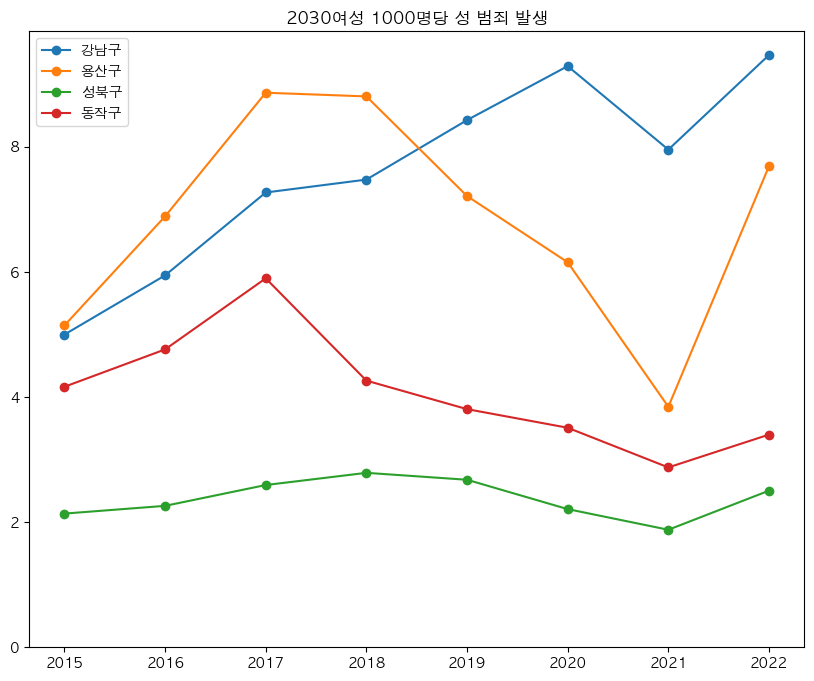

In [414]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot()
# 범죄 상위 3개 구
# 강남구
ax.plot(gangnam.index, gangnam["sex_per_w2030"], marker='o', label="강남구")
# ax.plot(gangnam.index, gangnam["sex_per_pop"], marker='o', label="강남구")

# 용산구
ax.plot(yongsan.index, yongsan["sex_per_w2030"], marker='o', label="용산구")
# ax.plot(yongsan.index, yongsan["sex_per_pop"], marker='o', label="용산구")

# 강북구
# ax.plot(yeondeung.index, gangbook["sex_per_w2030"], marker='o', label="강북구")

# 범죄 하위 3개 구
# 도봉구
# ax.plot(dobong.index, dobong["sex_per_pop"], marker='o', label="도봉구")

# 양천구
# ax.plot(yangcheon.index, yangcheon["sex_per_pop"], marker='o', label="양천구")

# # 성북구
ax.plot(seongbook.index, seongbook["sex_per_w2030"], marker='o', label="성북구")

ax.plot(dongjak.index, dongjak["sex_per_w2030"], marker='o', label="동작구")


ax.legend() ## 범례
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, ) # crime
# plt.ylim(0, 750) # sex_crime

# plt.title("상/하위 3개 구 cctv ~ 범죄")
# plt.title("상/하위 3개 구 cctv ~ 성 범죄")
plt.title("2030여성 1000명당 성 범죄 발생")

# plt.title("cctv 개수") # cctv
# plt.title('(성 범죄 제외)범죄 건수')    # crime
# plt.title('성 범죄 건수')    # sex_crime
plt.show()


### 업무중심지 vs 주거지역

In [469]:
county = "구로구"

# 각 데이터프레임 생성
cctv_dobong = cctv[cctv["county_name"] == county].transpose().iloc[1:, :]
crime_dobong = crime[crime["county_name"] == county].transpose().iloc[1:, :]
sex_crime_dobong = sex_crime[sex_crime["county_name"] == county].transpose().iloc[1:, :]

# 열 이름 설정 후 concat을 통해 데이터프레임 합치기
cctv_dobong.columns = ["cctv"]
crime_dobong.columns = ["crime"]
sex_crime_dobong.columns = ["sex_crime"]
guro = pd.concat([cctv_dobong, crime_dobong, sex_crime_dobong], axis=1)

guro

,cctv,crime,sex_crime
2015,654,5365,281
2016,994,5093,273
2017,1537,4567,328
2018,2068,4560,250
2019,2849,4481,226
2020,3501,3978,197
2021,4186,3304,182
2022,4525,3640,217


#### 주거지역
- 관악구
- 강서구
- 마포구

In [435]:
# 관악구
gwanak

,cctv,crime,sex_crime,pop,crime_per_pop
2015,1221,6025,320,509663,11.821537
2016,1828,5356,322,506851,10.567208
2017,2503,5146,379,503297,10.224579
2018,3166,4674,352,501957,9.311555
2019,4055,4920,408,500094,9.83815
2020,4459,4858,403,495060,9.812952
2021,5008,4123,321,485699,8.488797
2022,5143,4552,327,486752,9.351785


In [438]:
# 강서구
gangseo

,cctv,crime,sex_crime
2015,495,5323,262
2016,662,5175,275
2017,1078,4819,316
2018,1337,4360,269
2019,1794,4618,306
2020,2156,4150,265
2021,2597,3650,246
2022,3193,4402,261


In [436]:
# 마포구
mapo

,cctv,crime,sex_crime
2015,257,5560,294
2016,703,5474,399
2017,1071,4778,500
2018,1439,4699,473
2019,1933,4347,495
2020,2231,3340,348
2021,2408,3219,321
2022,2532,3660,436


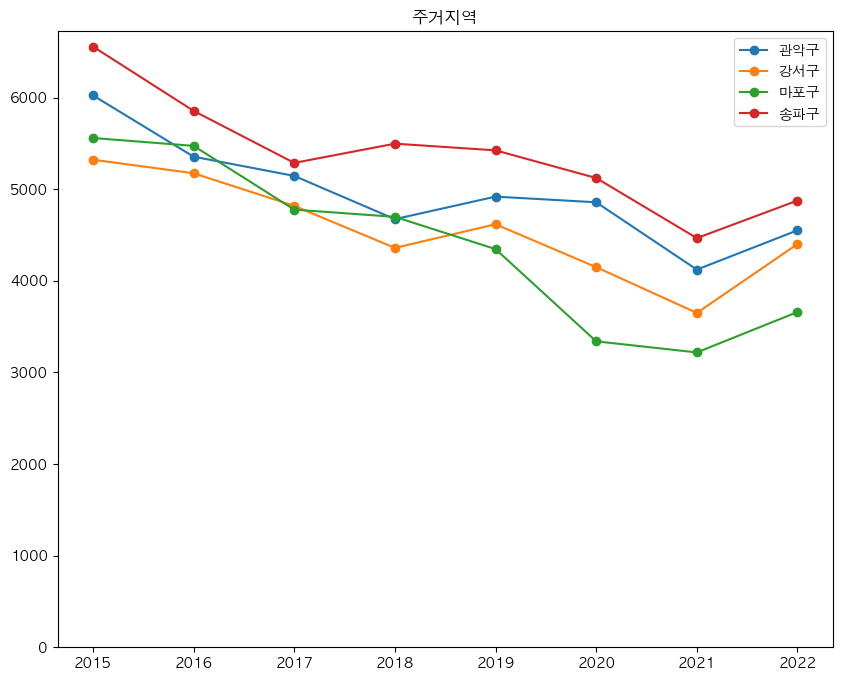

In [481]:
# 주거지역 범죄, cctv
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot()

# 관악구
ax.plot(gwanak.index, gwanak["crime"], marker='o', label="관악구")
# ax.plot(gwanak.index, gwanak["cctv"], marker='o', label="관악구")
# ax.plot(gwanak.index, gwanak["sex_crime"], marker='o', label="관악구")

# 강서구
ax.plot(gangseo.index, gangseo["crime"], marker='o', label="강서구")
# ax.plot(gangseo.index, gangseo["cctv"], marker='o', label="강서구")
# ax.plot(gangseo.index, gangseo["sex_crime"], marker='o', label="강서구")

# 마포구
ax.plot(mapo.index, mapo["crime"], marker='o', label="마포구")
# ax.plot(mapo.index, mapo["cctv"], marker='o', label="마포구")
# ax.plot(mapo.index, mapo["sex_crime"], marker='o', label="마포구")

# 송파구
ax.plot(songpa.index, songpa["crime"], marker='o', label="송파구")


ax.legend() ## 범례
plt.ylim(0, ) # crime
# plt.title("주거지역 범죄 건수")
plt.title("주거지역")
# plt.title("주거지역 cctv 개수")
plt.show()


#### 업무중심지구
- 강남구
- 중구
- 영등포구

In [440]:
# 강남구
gangnam

,cctv,crime,sex_crime,pop,crime_per_pop,w_ratio,pop_2030,w_2030,sex_per_w2030,sex_per_pop,cctv_per_pop
2015,1486,8168,449,576495,14.16838,0.48,187083,89799.84,5.000009,0.778845,2.577646
2016,2766,7633,516,567115,13.459351,0.48,180785,86776.80,5.94629,0.909868,4.877318
2017,3747,7113,607,556164,12.789393,0.48,173911,83477.28,7.27144,1.091405,6.737221
2018,4482,6913,600,542364,12.746052,0.48,167168,80240.64,7.477508,1.106268,8.263823
2019,5269,6638,666,545169,12.176041,0.48,164614,79014.72,8.428809,1.22164,9.664893
2020,6182,6648,708,539231,12.328668,0.48,158744,76197.12,9.29169,1.312981,11.464474
2021,6687,5568,578,533042,10.445706,0.48,151341,72643.68,7.956645,1.084342,12.544978
2022,7275,6280,667,529102,11.869167,0.48,146744,70437.12,9.469439,1.260626,13.749712


In [442]:
# 영등포구
yeondeung

,cctv,crime,sex_crime,pop,crime_per_pop,cctv_per_pop
2015,1263,6572,295,378504,17.363093,3.336821
2016,1511,5966,356,370613,16.097654,4.077029
2017,1822,5514,455,368550,14.961335,4.943698
2018,2479,5449,391,367778,14.816003,6.740479
2019,2544,5464,356,367678,14.860829,6.919098
2020,3758,4902,315,379480,12.917677,9.903025
2021,4041,3900,279,376837,10.349302,10.723469
2022,4382,4492,327,375675,11.957144,11.664338


In [456]:
# 중구
junggu

,cctv,crime,sex_crime
2015,511,4784,170
2016,750,4386,198
2017,1122,3917,267
2018,1508,3823,207
2019,1663,4132,195
2020,2027,3225,186
2021,2446,2700,161
2022,2583,2877,194


In [464]:
# 종로구
jongno

,cctv,crime,sex_crime
2015,707,4494,211
2016,835,4221,238
2017,978,3804,253
2018,1120,3454,236
2019,1187,3608,238
2020,1424,2910,192
2021,1506,2556,156
2022,1731,2910,228


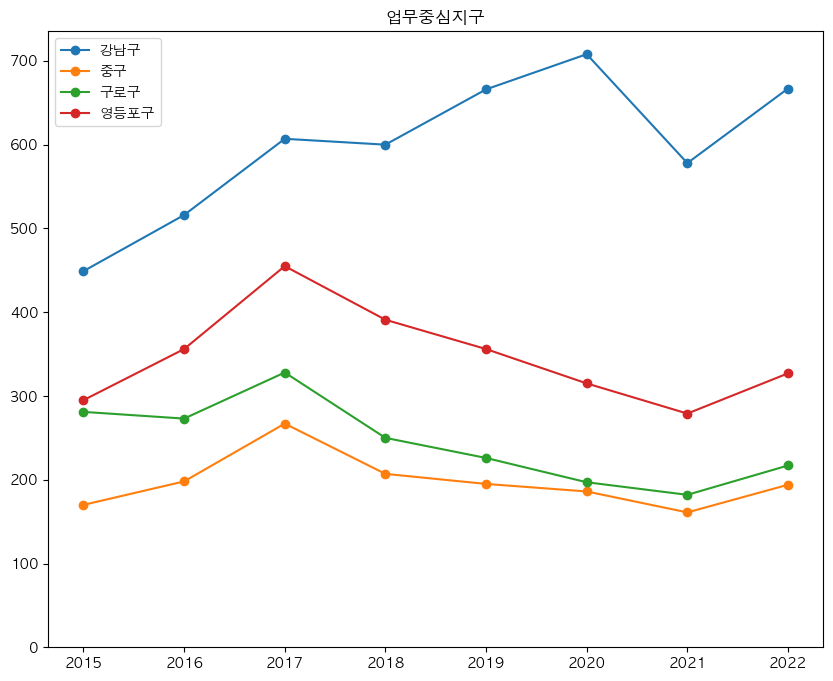

In [483]:
# 업무중심지구 범죄, cctv
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot()

## 업무중심지구
# 강남구
# ax.plot(gangnam.index, gangnam["crime"], marker='o', label="강남구")
# ax.plot(gangnam.index, gangnam["cctv"], marker='o', label="강남구")
ax.plot(gangnam.index, gangnam["sex_crime"], marker='o', label="강남구")

# 중구
ax.plot(junggu.index, junggu["sex_crime"], marker='o', label="중구")

# 구로
# ax.plot(guro.index, guro["cctv"], marker='o', label="구로구")
ax.plot(guro.index, guro["sex_crime"], marker='o', label="구로구")

# 영등포구
# ax.plot(yeondeung.index, yeondeung["crime"], marker='o', label="영등포구")
# ax.plot(yeondeung.index, yeondeung["cctv"], marker='o', label="영등포구")
ax.plot(yeondeung.index, yeondeung["sex_crime"], marker='o', label="영등포구")


ax.legend() ## 범례
plt.ylim(0, ) # crime
# plt.title("업무중심지구 cctv 개수")
plt.title("업무중심지구")
plt.show()

#### 미션2

발표할 때 깔아야 할 전제: 동 단위의 범죄 데이터가 없어서 이런 접근을 취했습니다. (꼭 넣어주기!)

상위 3개 지역, 하위 3개 지역 범죄 건수와 cctv 설치 대수 변화를 한 도표에 시각화
전반적으로 범죄 건수와 cctv 대수는 반비례 관계를 보이지만, cctv가 많이 설치된 지역이 상대적으로 범죄가 많이 발생하는 지역이라고도 볼 수 있다는걸 보여줌.

(이 때, 단순히 범죄 건수로 계산하지 말고 인구 1000명당 범죄 건수로 비교해볼 것)
2030 여성인구 1000명당 성범죄 건수 -> 굿!

cctv + 유흥업소로 안전한 동 유추 -> 결과 정성평가
ex) 강남 서초에서 안전한 동 -> 실제로 안전한 동네인지 (우수사례 기사 또는 무슨 상을 받았다.)
ex) 성북구 등에서 안전한 동 -> 실제로 안전한 동네인지

### 1. 전체 범죄 건수와 전체 cctv 설치 대수

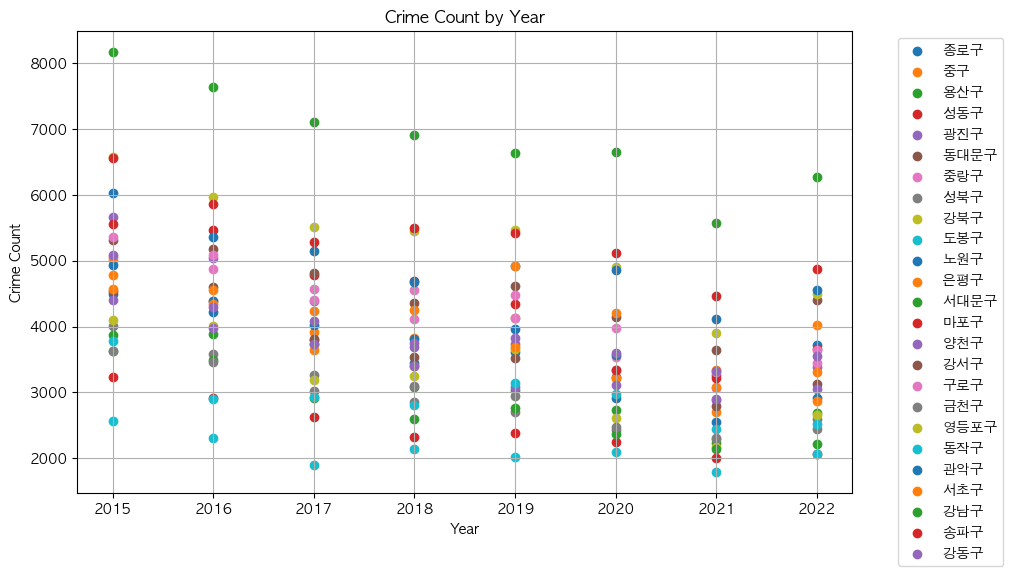

In [280]:
# 전체 범죄 건수

# Crime 데이터프레임 생성 (주어진 데이터 사용)
crime_data = {
    'county_name': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', 
                    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', 
                    '관악구', '서초구', '강남구', '송파구', '강동구'],
    '2015': [4494, 4784, 3626, 3232, 5669, 4547, 5006, 4004, 4104, 2562, 4933, 4579, 3875, 5560, 4408, 5323, 5365, 3630, 6572, 3789, 6025, 5051, 8168, 6558, 5088],
    '2016': [4221, 4386, 3886, 2922, 5043, 4597, 4877, 3590, 4012, 2315, 4384, 4345, 3490, 5474, 3981, 5175, 5093, 3470, 5966, 2902, 5356, 4561, 7633, 5856, 4302],
    '2017': [3804, 3917, 3733, 2635, 4385, 3810, 4399, 3261, 3185, 1895, 4029, 3653, 2911, 4778, 3744, 4819, 4567, 3025, 5514, 2934, 5146, 4238, 7113, 5288, 4089],
    '2018': [3454, 3823, 3080, 2331, 3686, 3535, 4114, 2859, 3249, 2136, 3813, 3402, 2596, 4699, 3395, 4360, 4560, 3093, 5449, 2812, 4674, 4256, 6913, 5498, 3749],
    '2019': [3608, 4132, 3041, 2379, 3738, 3524, 4130, 2701, 3662, 2020, 3969, 3686, 2768, 4347, 3087, 4618, 4481, 2952, 5464, 3149, 4920, 4926, 6638, 5425, 3834],
    '2020': [2910, 3225, 2739, 2247, 3346, 3240, 3543, 2425, 2611, 2097, 3574, 3219, 2374, 3340, 3107, 4150, 3978, 2481, 4902, 2974, 4858, 4205, 6648, 5123, 3600],
    '2021': [2556, 2700, 2240, 2002, 2879, 2790, 3069, 2293, 2165, 1788, 3269, 3078, 2141, 3219, 2899, 3650, 3304, 2305, 3900, 2451, 4123, 3344, 5568, 4467, 3334],
    '2022': [2910, 2877, 2687, 2069, 3389, 3128, 3449, 2591, 2655, 2071, 3716, 3311, 2217, 3660, 3055, 4402, 3640, 2450, 4492, 2523, 4552, 4028, 6280, 4877, 3554]
}

crime_df = pd.DataFrame(crime_data)

# 산점도 그리기
plt.figure(figsize=(10, 6))
for idx, row in crime_df.iterrows():
    plt.scatter(row.index[1:], row.values[1:], label=row['county_name'])

plt.title('Crime Count by Year')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


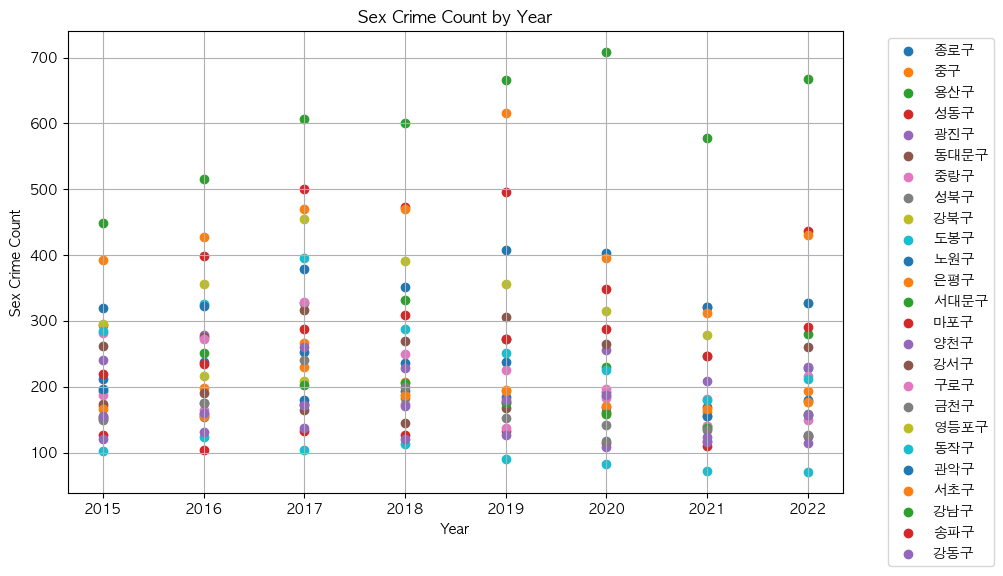

In [279]:
# 성 범죄 건수

# Sex crime 데이터프레임 생성 (주어진 데이터 사용)
sex_crime_data = {
    'county_name': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', 
                    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', 
                    '관악구', '서초구', '강남구', '송파구', '강동구'],
    '2015': [211, 170, 194, 126, 240, 173, 187, 150, 153, 102, 197, 166, 154, 294, 120, 262, 281, 151, 295, 285, 320, 393, 449, 220, 156],
    '2016': [238, 198, 251, 104, 279, 190, 164, 154, 217, 123, 159, 156, 175, 399, 131, 275, 273, 175, 356, 325, 322, 428, 516, 234, 160],
    '2017': [253, 267, 327, 132, 261, 165, 172, 173, 208, 104, 180, 230, 202, 500, 138, 316, 328, 240, 455, 396, 379, 470, 607, 288, 172],
    '2018': [236, 207, 331, 126, 229, 145, 174, 183, 188, 113, 194, 188, 206, 473, 120, 269, 250, 200, 391, 288, 352, 470, 600, 309, 170],
    '2019': [238, 195, 272, 133, 273, 168, 138, 176, 176, 90, 184, 194, 175, 495, 127, 306, 226, 153, 356, 251, 408, 616, 666, 273, 180],
    '2020': [192, 186, 230, 115, 255, 161, 183, 142, 159, 82, 169, 171, 159, 348, 109, 265, 197, 117, 315, 226, 403, 396, 708, 287, 188],
    '2021': [156, 161, 141, 110, 208, 169, 141, 118, 136, 72, 156, 166, 137, 321, 116, 246, 182, 134, 279, 180, 321, 312, 578, 247, 124],
    '2022': [228, 194, 280, 125, 230, 125, 150, 158, 177, 70, 180, 176, 157, 436, 114, 261, 217, 127, 327, 212, 327, 431, 667, 290, 157]
}

sex_crime_df = pd.DataFrame(sex_crime_data)

# 산점도 그리기
plt.figure(figsize=(10, 6))
for idx, row in sex_crime_df.iterrows():
    plt.scatter(row.index[1:], row.values[1:], label=row['county_name'])

plt.title('Sex Crime Count by Year')
plt.xlabel('Year')
plt.ylabel('Sex Crime Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


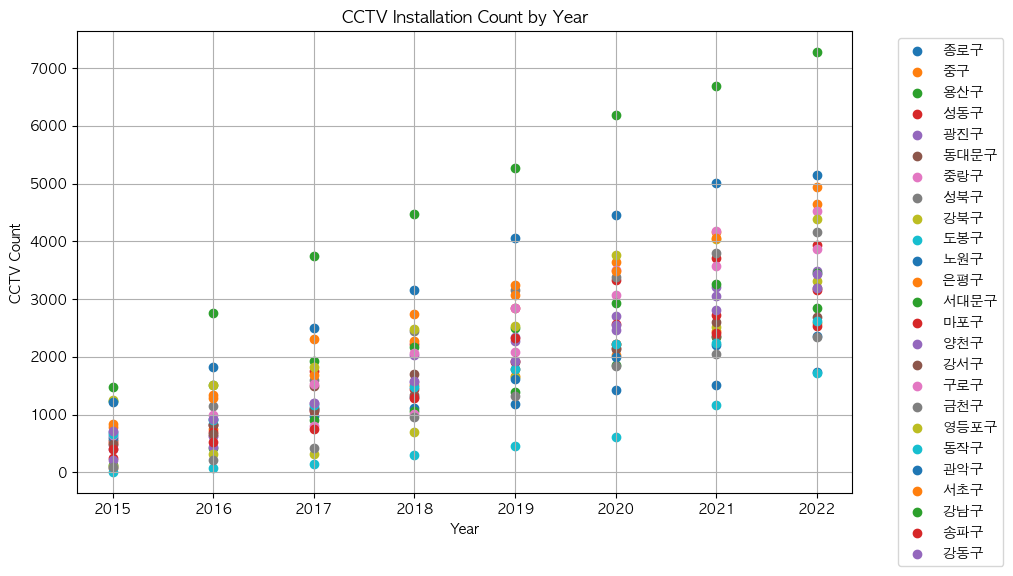

In [283]:
# cctv 설치 대수
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
data = {
    'county_name': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', 
                    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', 
                    '관악구', '서초구', '강남구', '송파구', '강동구'],
    '2015': [707, 511, 126, 542, 404, 78, 479, 575, 105, 3, 622, 841, 1235, 257, 220, 495, 654, 92, 1263, 658, 1221, 779, 1486, 406, 725],
    '2016': [835, 750, 421, 820, 446, 827, 632, 1147, 315, 71, 932, 1334, 1512, 703, 638, 662, 994, 222, 1511, 903, 1828, 1293, 2766, 532, 927],
    '2017': [978, 1122, 912, 1759, 1112, 1497, 802, 1595, 319, 151, 1094, 1695, 1928, 1071, 1204, 1078, 1537, 418, 1822, 1173, 2503, 2315, 3747, 759, 1200],
    '2018': [1120, 1508, 1059, 2216, 1572, 1696, 1017, 2445, 694, 303, 1302, 2274, 2174, 1439, 2031, 1337, 2068, 957, 2479, 1472, 3166, 2737, 4482, 1285, 1577],
    '2019': [1187, 1663, 1394, 2856, 2284, 1911, 2091, 3158, 1657, 452, 1613, 3253, 2499, 1933, 2352, 1794, 2849, 1323, 2544, 1784, 4055, 3076, 5269, 2335, 1933],
    '2020': [1424, 2027, 1867, 3339, 2475, 2140, 3067, 3384, 2226, 608, 1995, 3639, 2940, 2231, 2704, 2156, 3501, 1837, 3758, 2217, 4459, 3495, 6182, 2572, 2547],
    '2021': [1506, 2446, 2353, 3705, 3215, 2366, 3574, 3802, 2524, 1160, 2208, 4159, 3271, 2408, 3051, 2597, 4186, 2044, 4041, 2245, 5008, 4060, 6687, 2723, 2809],
    '2022': [1731, 2583, 2853, 3938, 3488, 2683, 3868, 4157, 3321, 1717, 2369, 4640, 3445, 2532, 3437, 3193, 4525, 2348, 4382, 2617, 5143, 4938, 7275, 3154, 3190]
}

df = pd.DataFrame(data)

# # 연도를 컬럼으로 갖는 데이터프레임 생성
# df_years = df.melt(id_vars='county_name', var_name='year', value_name='cctv_count')
# df_years['year'] = df_years['year'].astype(int)  # 연도를 정수형으로 변환

# # 산점도 그리기
# plt.figure(figsize=(10, 6))
# for idx, row in df_years.iterrows():
#     plt.scatter(row['year'], row['cctv_count'], label=row['county_name'])
#     plt.scatter(row['year'], row['cctv_count'])



# 산점도 그리기
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.scatter(row.index[1:], row.values[1:], label=row['county_name'])

plt.title('CCTV Installation Count by Year')
plt.xlabel('Year')
plt.ylabel('CCTV Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [240]:
crime = pd.read_csv("./서울_범죄_15to22.csv")
# crime

In [241]:
crime = crime.drop(["살인", "강도", "절도", "폭력", "살인.1", "강도.1", "절도.1", "폭력.1", "살인.2", "강도.2", "절도.2", "폭력.2",
           "살인.3", "강도.3", "절도.3", "폭력.3", "살인.4", "강도.4", "절도.4", "폭력.4", "살인.5", "강도.5", "절도.5", "폭력.5",
           "살인.6", "강도.6", "절도.6", "폭력.6", "살인.7", "강도.7", "절도.7", "폭력.7"], axis=1)
# crime

In [242]:
crime = crime.iloc[1:, :]
# crime

In [243]:
crime = crime.rename(mapper={"자치구별(2)": "county_name"}, axis=1)
crime

,county_name,crime_2015,sex_2015,crime_2016,sex_2016,crime_2017,sex_2017,crime_2018,sex_2018,crime_2019,sex_2019,crime_2020,sex_2020,crime_2021,sex_2021,crime_2022,sex_2022
1,종로구,4494,211,4221,238,3804,253,3454,236,3608,238,2910,192,2556,156,2910,228
2,중구,4784,170,4386,198,3917,267,3823,207,4132,195,3225,186,2700,161,2877,194
3,용산구,3626,194,3886,251,3733,327,3080,331,3041,272,2739,230,2240,141,2687,280
4,성동구,3232,126,2922,104,2635,132,2331,126,2379,133,2247,115,2002,110,2069,125
5,광진구,5669,240,5043,279,4385,261,3686,229,3738,273,3346,255,2879,208,3389,230
6,동대문구,4547,173,4597,190,3810,165,3535,145,3524,168,3240,161,2790,169,3128,125
7,중랑구,5006,187,4877,164,4399,172,4114,174,4130,138,3543,183,3069,141,3449,150
8,성북구,4004,150,3590,154,3261,173,2859,183,2701,176,2425,142,2293,118,2591,158
9,강북구,4104,153,4012,217,3185,208,3249,188,3662,176,2611,159,2165,136,2655,177
10,도봉구,2562,102,2315,123,1895,104,2136,113,2020,90,2097,82,1788,72,2071,70


In [244]:
sex_crime = crime[["county_name", "sex_2015", "sex_2016", "sex_2017", "sex_2018", "sex_2019",
                  "sex_2020", "sex_2021", "sex_2022"]]
# sex_crime

In [245]:
sex_crime.columns

Index(['county_name', 'sex_2015', 'sex_2016', 'sex_2017', 'sex_2018',
       'sex_2019', 'sex_2020', 'sex_2021', 'sex_2022'],
      dtype='object')

In [246]:
sex_crime = sex_crime.rename(mapper={
    'sex_2015': 2015,
    'sex_2016': 2016,
    'sex_2017': 2017,
    'sex_2018': 2018,
    'sex_2019': 2019,
    'sex_2020': 2020,
    'sex_2021': 2021,
    'sex_2022': 2022
}, axis=1)
sex_crime

,county_name,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,211,238,253,236,238,192,156,228
2,중구,170,198,267,207,195,186,161,194
3,용산구,194,251,327,331,272,230,141,280
4,성동구,126,104,132,126,133,115,110,125
5,광진구,240,279,261,229,273,255,208,230
6,동대문구,173,190,165,145,168,161,169,125
7,중랑구,187,164,172,174,138,183,141,150
8,성북구,150,154,173,183,176,142,118,158
9,강북구,153,217,208,188,176,159,136,177
10,도봉구,102,123,104,113,90,82,72,70


In [247]:
crime = crime[["county_name", "crime_2015", "crime_2016", "crime_2017", "crime_2018", "crime_2019",
                  "crime_2020", "crime_2021", "crime_2022"]]
crime

,county_name,crime_2015,crime_2016,crime_2017,crime_2018,crime_2019,crime_2020,crime_2021,crime_2022
1,종로구,4494,4221,3804,3454,3608,2910,2556,2910
2,중구,4784,4386,3917,3823,4132,3225,2700,2877
3,용산구,3626,3886,3733,3080,3041,2739,2240,2687
4,성동구,3232,2922,2635,2331,2379,2247,2002,2069
5,광진구,5669,5043,4385,3686,3738,3346,2879,3389
6,동대문구,4547,4597,3810,3535,3524,3240,2790,3128
7,중랑구,5006,4877,4399,4114,4130,3543,3069,3449
8,성북구,4004,3590,3261,2859,2701,2425,2293,2591
9,강북구,4104,4012,3185,3249,3662,2611,2165,2655
10,도봉구,2562,2315,1895,2136,2020,2097,1788,2071


In [248]:
crime = crime.rename(mapper={
    'crime_2015': 2015,
    'crime_2016': 2016,
    'crime_2017': 2017,
    'crime_2018': 2018,
    'crime_2019': 2019,
    'crime_2020': 2020,
    'crime_2021': 2021,
    'crime_2022': 2022
}, axis=1)
crime

,county_name,2015,2016,2017,2018,2019,2020,2021,2022
1,종로구,4494,4221,3804,3454,3608,2910,2556,2910
2,중구,4784,4386,3917,3823,4132,3225,2700,2877
3,용산구,3626,3886,3733,3080,3041,2739,2240,2687
4,성동구,3232,2922,2635,2331,2379,2247,2002,2069
5,광진구,5669,5043,4385,3686,3738,3346,2879,3389
6,동대문구,4547,4597,3810,3535,3524,3240,2790,3128
7,중랑구,5006,4877,4399,4114,4130,3543,3069,3449
8,성북구,4004,3590,3261,2859,2701,2425,2293,2591
9,강북구,4104,4012,3185,3249,3662,2611,2165,2655
10,도봉구,2562,2315,1895,2136,2020,2097,1788,2071


In [249]:
# crime["total"] = crime[2015] + crime[2016] + crime[2017] + crime[2018] + crime[2019] + crime[2020] + crime[2021] + crime[2022]
# crime